# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure for finding the optimal value of the parameter(s) of a data model given data work?

2. What are good working definitions for the likelihood and prior?

*A function of the parameter $\theta$ of a data model $f_\theta(x_i)$ which defines the value of $\prod_{i=1}^n f_\theta(x_i)$ the (joint) density (or probability) for the observed continuous (or discrete) data $x$ at the value $\theta$.*

*A prior is our beliefs about the possible values of parameters, most likely expressed as a density or probability mass function* (since this provides a most expeditious language to express these beliefs).*

<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

*Nothing: the data model and the experiment together dictate the parameters of interest; ny prior beliefs about the parameters is then expressed; then data is collected and the posterior updated; this encodes our updated beliefs from which posterior belief statements may be made.*

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution
2. Express this statement as an expectation with $f(x)$ the beta density in question

$P(a \leq X \leq b) = \int_a^b f(x) dx$
where f(x) is the beta density function:
$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$


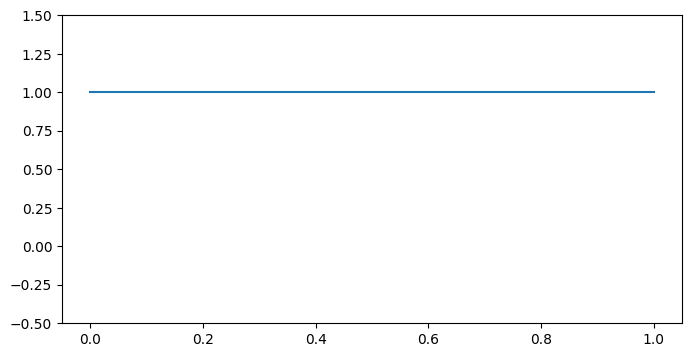

In [1]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [2]:
prior.cdf(.2)

0.2

In [5]:
m = 10000
(prior.rvs(m)<0.2).mean()


0.2003

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


0.309 0.014612289348353324 0.32157197000000004


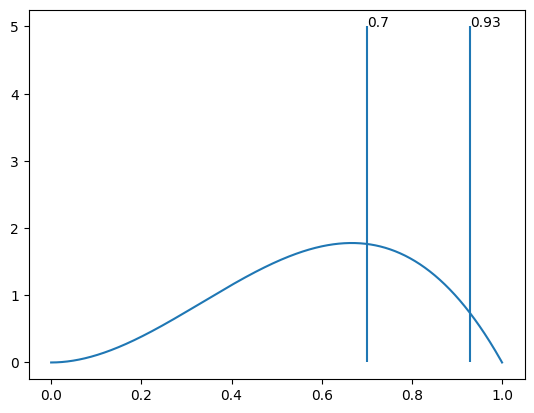

In [13]:
# This is the (reorganized) code I produced throughout the lecture

alpha,beta = 3,2 # arbitrary
a,b = .7,.93  # arbitrary interval boundaries for the credible interval
my_beta = stats.beta(alpha,beta)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m)

# boolean array of which samples are in interval
in_interval = (x >= a) & (x <= b)  # 0/1 outcomes


print(in_interval.mean(),  # average of the indicator variables, i.e. a Monte Carlo probability estimate
      in_interval.std()/m**0.5,  # Standard error of the estimate. Note m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))  # True probability of the beta distributed variable X falling between a and b


# Diversion 1: Likelihoods

---


This code creates and plots a likelihood function for a binomial distribution.

We have an experiment where:

We performed $n=10$ trials, observed $x=8$ successes, and we want to know about the underlying probability of success (θ).


The likelihood function $L(θ) = P(X=x|θ)$ tells us for each possible value of $θ$ (probability of success), how likely we were to observe exactly 8 successes in 10 trials.

$L(θ) = P(X=8|n=10,θ) = \binom{10}{8} \cdot θ^8 \cdot (1-θ)^{(10-8)}$



*   The x-axis is the possible values of $\theta$ from 0 to 1
*   The y-axis is the likelihood value of 8 successes in 10 trials given this value of $\theta$

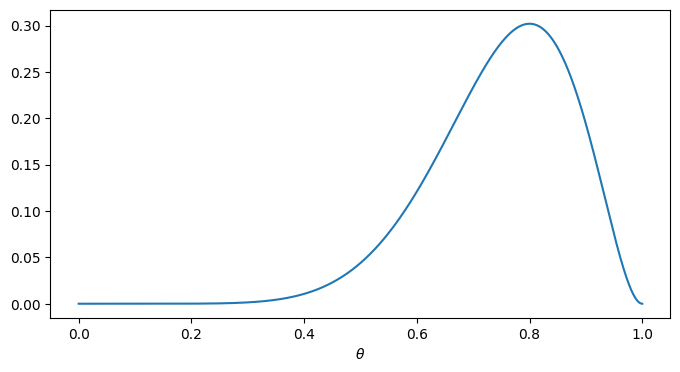

In [14]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n,p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


We have a Beta-Binomial conjugate pair. Conjugate pairs in Bayesian statistics have the prior and posterior in the same family of distributions.
* The posterior combines information from both prior and likelihood
* The Beta-Binomial case has a closed form posterior (Beta distribution)
* The posterior parameters are simple: add successes to α and failures to β
* The normalizing constant isn't needed because we know the posterior form

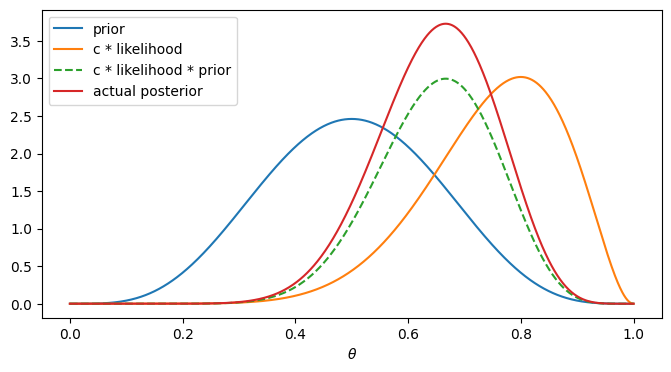

In [15]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain),
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n,p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood (scaled likelihood for the data)')
plt.plot(parameter_domain,
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior (unnormalized posterior)', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain),
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling (sample from the posterior)
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$? (Finding a 95% Credible Interval analytically using the probability point function (the inverse of the cdf): we're looking for values of a and b that contain 95% of the posterior probability.)
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution? (Finding 95% Credible Interval using Monte Carlo sampling)


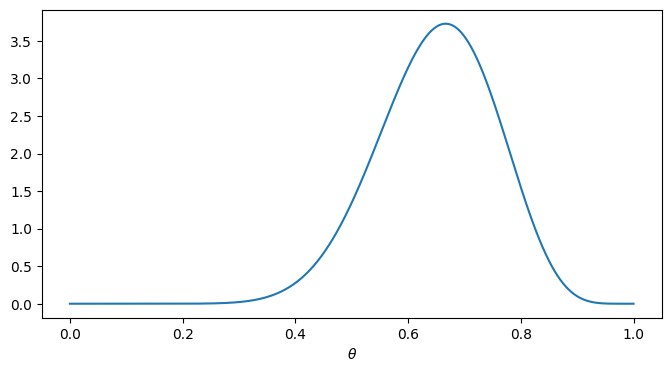

In [16]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


0.951 0.006826346021115543 0.95


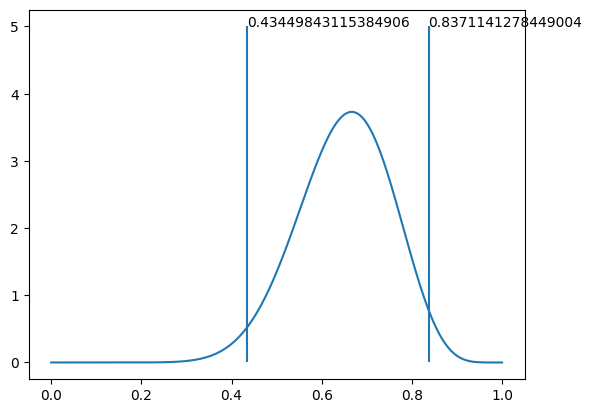

In [19]:
# Same (reorganized) code I produced throughout the lecture
# with the following change

#alpha,beta = 3,2 # arbitrary
#a,b = .7,.93  # arbitrary
#my_beta = stats.beta(alpha,beta)

### Finding the 95% Credible Interval analytically
n,x = 10,8
my_beta = stats.beta(alpha+x,beta+n-x)
a,b = my_beta.ppf(.025),my_beta.ppf(.975)
### Finding the 95% Credible Interval

# Plotting the 95% CI
u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

# Verify the credible interval using Monte Carlo
m = 1000  # Monte Carlo samples
x = my_beta.rvs(m)

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(),
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


In [20]:
### Finding the 95% Credible Interval using Monte Carlo
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]
# my_beta.ppf(.025),my_beta.ppf(.975)  # truth

(0.437716733606246, 0.8292079748176127)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

A Bayesian credible interval and a frequentist confidence interval are both ways to express uncertainty about a parameter, but they have fundamentally different interpretations and philosophical approaches.

**Bayesian Credible Interval**:
- This is a direct probability statement about where we believe the parameter θ lies, given our data and prior beliefs
- For a 95% credible interval [a,b], we can say: "Given our data and prior beliefs, there is a 95% probability that θ lies between a and b"
- In our code example:
  ```python
  a, b = my_beta.ppf(.025), my_beta.ppf(.975)
  ```
  This gives us boundaries where there's a 95% probability that θ falls within them under our posterior distribution

**Frequentist Confidence Interval**:
- This is a statement about the procedure used to construct the interval, not about the parameter itself
- For a 95% confidence interval, we can say: "If we repeated this sampling procedure many times, about 95% of the constructed intervals would contain the true parameter value"
- We cannot say there's a 95% probability the parameter lies in any specific interval
- The parameter is viewed as fixed but unknown, not as a random variable

Key Differences:
1. Interpretation:
   - Credible interval makes direct probability statements about the parameter
   - Confidence interval makes statements about the frequency properties of the interval-construction procedure

2. Prior Information:
   - Credible intervals incorporate prior knowledge through the prior distribution
   - Confidence intervals only use the data at hand

3. Calculation:
   - Credible intervals are calculated using the posterior distribution
   - Confidence intervals are typically calculated using sampling distributions

In our code, we used the Beta posterior distribution to find the credible interval, which gives us a direct probability statement about where θ lies after observing our data and incorporating our prior beliefs.

In [21]:
"""
Lower bound of the credible interval:
Takes our m=1000 samples
Finds the 2.5th percentile (m/40 = 25th sample when sorted)
Calculates proportion of samples below this value
Should be approximately 0.025 (2.5%)
"""
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[int(m/40)]).mean()

0.025

In [22]:
"""
Upper bound of the credible interval:
Finds the 97.5th percentile
Calculates proportion of samples below this value
Should be approximately 0.975 (97.5%)
"""
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[-int(m/40)]).mean()

0.975

In [23]:
# But these choices are Monte Carlo estimates
# with standard error given by
(posterior_m < sorted(posterior_m)[int(m/40)]).std()/m**0.5

0.004937104414532875

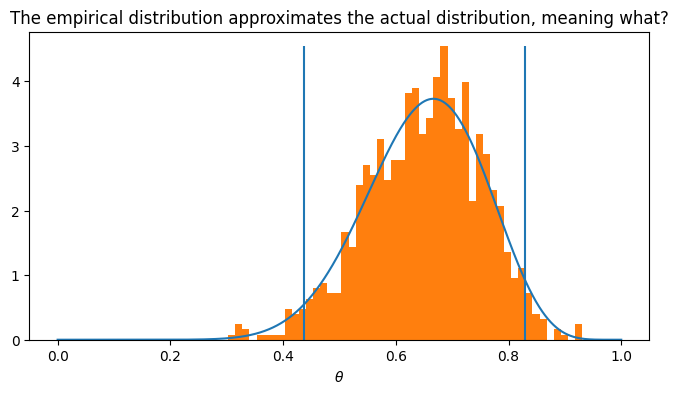

In [25]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

# Uncommenting this to see the Bayesian Credible interval
plt.vlines([sorted(posterior_m)[int(m/40)],
           sorted(posterior_m)[-int(m/40)]],0,hist[0].max());

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
(It allows us to estimate properties of complex probability distributions through sampling, even when we can't calculate them analytically.)
6. Why might this be useful?
* Many real-world Bayesian models have posterior distributions that are too complex for analytical solutions
* We can handle high-dimensional problems and complex hierarchical models
* It's often easier to sample from a distribution than to integrate it analytically
* We can estimate any quantity of interest from the samples (means, quantiles, intervals, etc.)
7. How is this different than calculating probabilities from mathematical definitions of a distribution?
* Mathematical definitions require explicit integration or probability calculations. But for complicated distributions, analytical solutions might not exist/may be intractable
8. Why is Bayesian inference different from Frequentist inference?
The Bayesian approach:

* Treats parameters (θ) as random variables with distributions
* Updates prior beliefs with data to get posterior distributions
* Makes direct probability statements about parameters
* Naturally incorporates uncertainty through the entire distribution


The Frequentist approach would:

* Treat parameters as fixed (but unknown) values
* Base inference solely on sampling distributions
* Cannot make direct probability statements about parameters
* Expresses uncertainty through confidence intervals and p-values

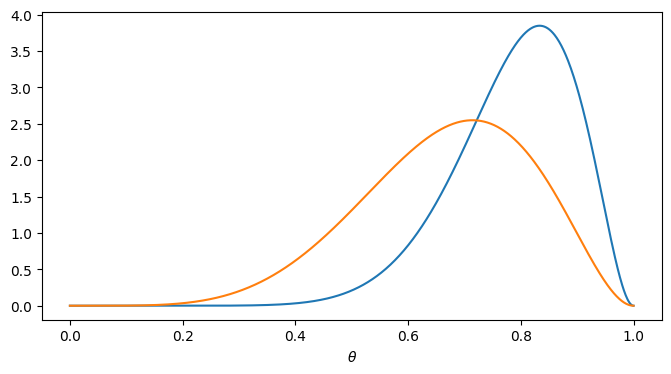

In [26]:
# Let's compare two distributions...

alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?

\begin{align*}
\Pr(\theta_1<\theta_2|x1,x2) &= \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2 \\
&\approx \frac{1}{n} \sum_i 1_{\theta_1 < \theta_2}(\theta_{i1}, \theta_{i2})
\end{align*}
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
Note that $\Pr(\theta_1<\theta_2|x_1,x_2)$ is the chance that $\theta_{i1} < \theta_{i2}$ for each $i$. $1_{\theta_1 < \theta_2}(\theta_{i1}, \theta_{i2})$ is a Bernoulli random variable actualization of this chance. Then the mean of these Bernoulli random variable instances estimates the probability $\Pr(\theta_1<\theta_2|x_1,x_2)$.
11. What is the density $f(\theta_1 \div \theta_2)$?
Analogously, $\theta_{i1} \div \theta_{i2}$ is an actualization of a sample from this probability density $f$. Sample from them and make a Monte Carlo estimate.

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; Beta(α + x, β + n - x)$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

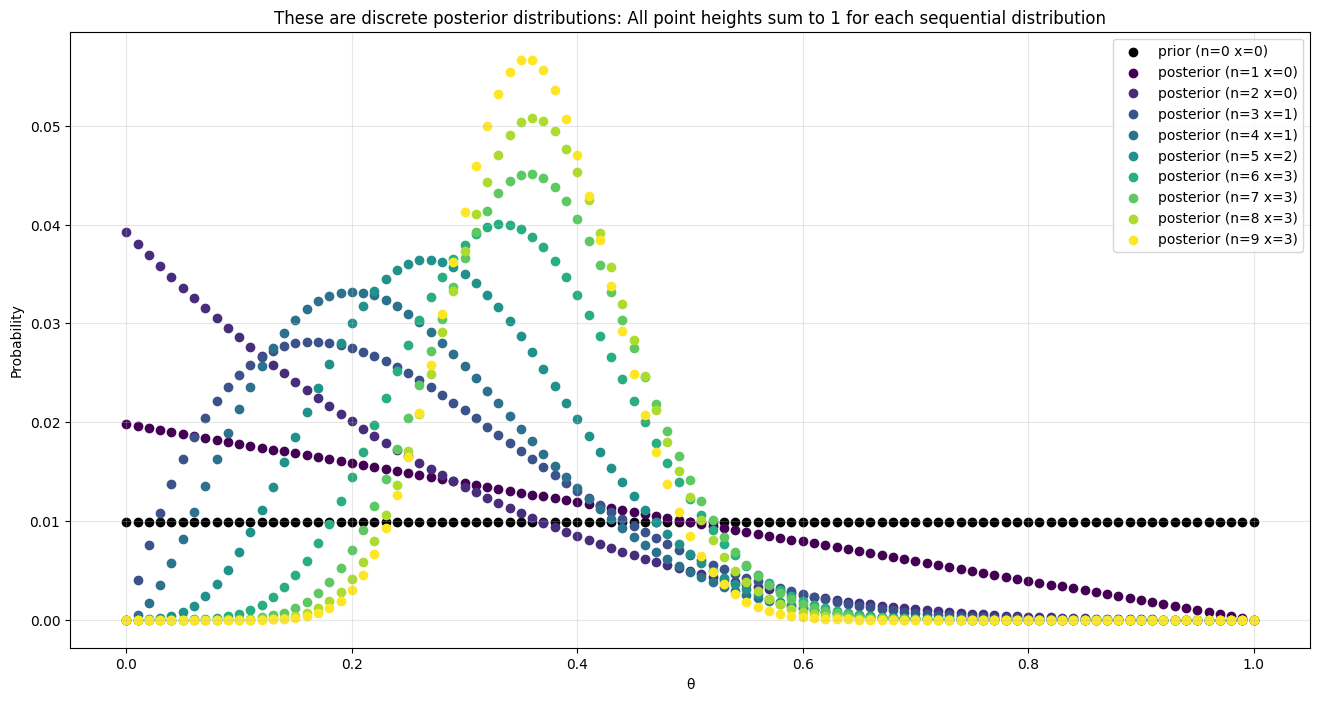

In [30]:
###### Q1

# Set up parameter space and prior
parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101  # discrete uniform prior

# Setup for observations
observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0

plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
colors = plt.cm.viridis(np.linspace(0, 1, len(observations)))  # new colourmap

# update sequentially
for i, observation in enumerate(observations):
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution

    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update

    # Calculate likelihood for each theta
    likelihood = stats.binom.pmf(x, n, parameter_domain)

    # Calculate posterior (proportional to likelihood * prior)
    posterior = likelihood * prior

    # Normalize posterior to sum to 1
    posterior = posterior / np.sum(posterior)

    # Plot posterior
    plt.scatter(parameter_domain, posterior,
               label=f"posterior (n={n} x={x})",
               color=colors[i])

    # Update prior for next iteration
    prior = posterior.copy()

    # plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.xlabel('θ')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

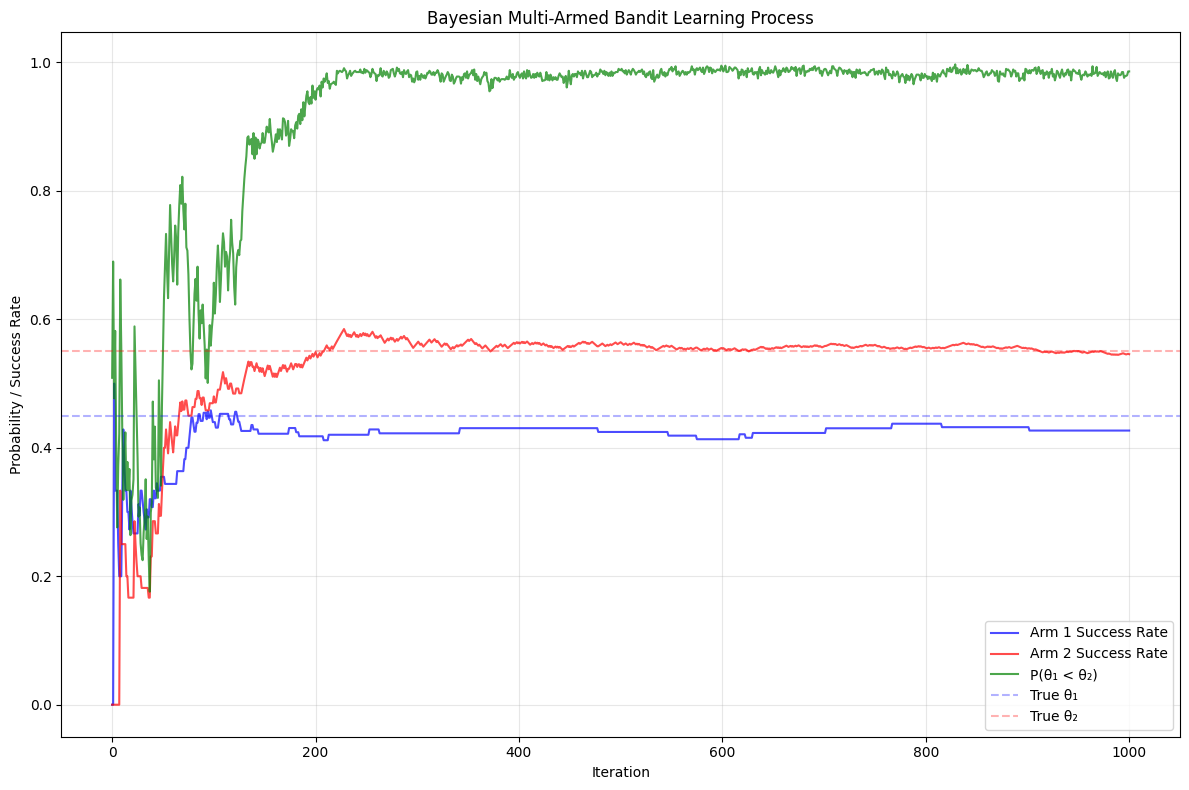

In [47]:
###### Q2

# True probabilities for our two arms
theta1_true = 0.45
theta2_true = 0.55

# Prior parameters
alpha1, beta1 = 1, 1  # Prior for arm 1
alpha2, beta2 = 1, 1  # Prior for arm 2

# Storage for our learning process
m = 1000  # number of iterations
n1_history = np.zeros(m+1)
x1_history = np.zeros(m+1)
n2_history = np.zeros(m+1)
x2_history = np.zeros(m+1)
prob_2_bigger_history = np.zeros(m+1)

# Initialize
n1 = x1 = 0
n2 = x2 = 0

for t in range(m):
    # Current posteriors
    posterior1 = stats.beta(alpha1 + x1, beta1 + n1 - x1)
    posterior2 = stats.beta(alpha2 + x2, beta2 + n2 - x2)

    # Estimate P(theta1 < theta2) using Monte Carlo
    samples = 1000
    theta1_samples = posterior1.rvs(samples)
    theta2_samples = posterior2.rvs(samples)
    prob_2_bigger = (theta1_samples < theta2_samples).mean()

    # Store history
    n1_history[t] = n1
    x1_history[t] = x1
    n2_history[t] = n2
    x2_history[t] = x2
    prob_2_bigger_history[t] = prob_2_bigger

    # Choose arm based on probability
    if np.random.random() < prob_2_bigger:
        # Try arm 2
        n2 += 1
        if np.random.random() < theta2_true:
            x2 += 1
    else:
        # Try arm 1
        n1 += 1
        if np.random.random() < theta1_true:
            x1 += 1

# Store final values
n1_history[m] = n1
x1_history[m] = x1
n2_history[m] = n2
x2_history[m] = x2
prob_2_bigger_history[m] = prob_2_bigger

# Calculate success rates
success_rate1 = np.divide(x1_history, n1_history, where=n1_history!=0)
success_rate2 = np.divide(x2_history, n2_history, where=n2_history!=0)

# Create visualization
plt.figure(figsize=(12, 8))

# Plot success rates and probability
plt.plot(success_rate1, label='Arm 1 Success Rate', color='blue', alpha=0.7)
plt.plot(success_rate2, label='Arm 2 Success Rate', color='red', alpha=0.7)
plt.plot(prob_2_bigger_history, label='P(θ₁ < θ₂)', color='green', alpha=0.7)

# Add true probabilities as horizontal lines
plt.axhline(y=theta1_true, color='blue', linestyle='--', alpha=0.3, label='True θ₁')
plt.axhline(y=theta2_true, color='red', linestyle='--', alpha=0.3, label='True θ₂')

# Customize plot
plt.xlabel('Iteration')
plt.ylabel('Probability / Success Rate')
plt.title('Bayesian Multi-Armed Bandit Learning Process')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

**Answer:**

For the specific multi-armed bandit context, the independent Beta-Binomial approach is more appropriate because it allows for more direct computation of the probability that one arm is better than another. I believe that the Beta-Binomial is better when each entity has its own independent true probability and the Dirichlet-Multinomial is better when probabilities of each entity are conditional; i.e. outcomes of entities are correlated somehow. For instance, these entities could be competing alternatives.

For a real-world context, consider that we are testing three different call-to-action buttons on a website's landing page: "Start Free Trial," "Learn More," and "Schedule Demo." Each visitor to our site sees one of these options, and we track whether they click (success) or don't click (failure). We want to maximize clicks while learning which button performs best.

In this scenario, the Beta-Binomial approach would likely be more appropriate. Users typically evaluate each call-to-action independently - their likelihood of clicking "Start Free Trial" isn't necessarily related to how likely they would be to click "Schedule Demo."

The Bayesian multi-armed bandit approach would effectively balance the exploration-exploitation tradeoff, i.e. exploring all options and exploiting the currently best-performing option in this scenario. The algorithm would maintain success and failure counts for each button, and with each visitor, it would estimate the probability that each button is the best performer based on the counts of success/failure recorded. It would then probabilistically choose which button to show next based on these probabilities, which would favour buttons with higher probability of being the best but still occasionally trying less promising options.
My understanding is that this approach would gradually shift traffic toward better-performing options yet still be responsive to changes over time - if user preferences shift, the algorithm will naturally adapt by continuing to explore all options, just at different rates.

As an example for this scenario, we might find that "Start Free Trial" performs best initially, but the algorithm would continue occasionally testing the other options based on the probability described in Step 3. If user preferences change, the algorithm would detect this through its ongoing exploration and adjust accordingly.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data